#Problema de la Guía 3  
###S. Schiavinato - LU 153/11

####Código utilitario, librerías y funcionalidad de IPython

In [2]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

plt.rcParams["figure.figsize"] = (5*(1+np.sqrt(5))/2, 5)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["axes.labelsize"] = 15

:0: FutureWarning: IPython widgets are experimental and may change in the future.


##Ejercicio 4  
###Obtener a partir de una distribución uniforme una distribución exponencial

####Deducción teórica

Originalmente yo tengo una variable aleatoria uniforme entre 0 y 1, que llamo X

In [3]:
%%latex
\[X \sim \text{Uniforme}(0,1) \Rightarrow f(x) = \begin{cases} 1 & \text{si } 0 \leq x \leq 1 \\ 0 & \text{si no}\end{cases}\]

<IPython.core.display.Latex object>

Y deseo transformarla a una variable aleatoria Y que tenga una distribución exponencial

In [4]:
%%latex
\[Y \sim \text{Exponencial}(\lambda) \Rightarrow f(y) = \lambda e^{-\lambda y} \]

<IPython.core.display.Latex object>

Si pedimos que se mantenga la probabilidad bajo la transformación

In [5]:
%%latex
\[f(x) dx = g(y) dy \Rightarrow g(y) = f(x) \frac{dx}{dy}  \]

<IPython.core.display.Latex object>

In [6]:
%%latex
\[ \lambda e^{-\lambda y} = \frac{dx}{dy}\]
\[ x = - e^{-\lambda y}\]

<IPython.core.display.Latex object>

Para poder invertir, usamos que una variable aleatoria z = 1 - x también tiene distribución uniforme entre 0 y 1

In [7]:
%%latex
\[1 - x = - e^{-\lambda y}\]
\[\log(x - 1) = -\lambda y\]
\[y = - \frac{1}{\lambda} \log(x - 1) = - \frac{\log(x)}{\lambda} \]

<IPython.core.display.Latex object>

Donde se usó nuevamente que la distribución x - 1 también es una distribución uniforme entre 0 y 1.

####Código

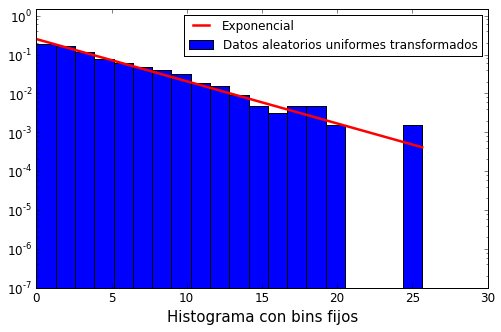

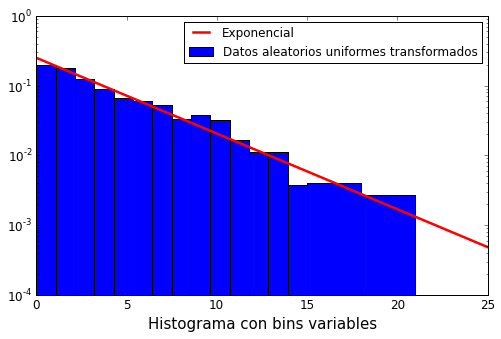

In [19]:
def G3_E9(s=0.25):
    #Datos
    N, n_bins = 500, 20 
    U = rnd.uniform(0,1,N) #Resultados de N experimentos aleatorios entre 0 y 1
    
    #Funciones para la impresión
    expD = lambda x, s: s * np.exp(-s*x) #Distribución exponencial
    f = lambda x, s: -1/s*np.log(x) #y = f(x) = -1/s*ln(x), si x = Uniforme(0,1)
    
    #Gráficos
    
    plt.figure(1)
    plt.yscale("log")
    plt.ylim((0,1.5)) #Fijo los límites así se ve mejor comparativamente
    hist, bins = np.histogram(f(U,s), bins = n_bins, density=True)
    plt.bar(bins[:-1], hist, width=np.diff(bins),  label="Datos aleatorios uniformes transformados");
    t = np.linspace(0, np.amax(bins), 1000) #Vector para graficar la PDF de la distribución exponencial
    plt.plot(t, expD(t, s), 'r-',label="Exponencial");
    plt.xlabel("Histograma con bins fijos")
    plt.legend(loc=0)
    

    plt.figure(2)
    t = np.linspace(0, 25, 1000)
    bins2 = np.concatenate((np.linspace(0, 15, 15), np.arange(18, 25, 3))) #Bins del segundo histograma
    hist2, bins2 = np.histogram(f(U,s), bins = bins2, density=True)
    plt.yscale("log")
    plt.bar(bins2[:-1], hist2, width = np.diff(bins2), label="Datos aleatorios uniformes transformados");
    plt.plot(t, expD(t, s), 'r-',label="Exponencial");
    plt.xlabel("Histograma con bins variables")
    plt.legend(loc=0)

G3_E9()

##Ejercicio 9

###Funciones utilitarias, distribuciones a usar

In [24]:
gauss = lambda x, s, mu: 1/(s*np.sqrt(2*np.pi)) * np.exp(- (x - mu)**2/(2*s**2))
cauchy = lambda x : 1/np.pi * 1 /(1 + x**2) 
f = lambda x, a, s1, s2: a * gauss(x, s=s1 , mu=0) + (1-a) * gauss(x, s = s2, mu=0) #Suma de Gaussianas, 

###Inciso a: Graficar una distribución N(0,75) y una Cauchy estándar normalizadas

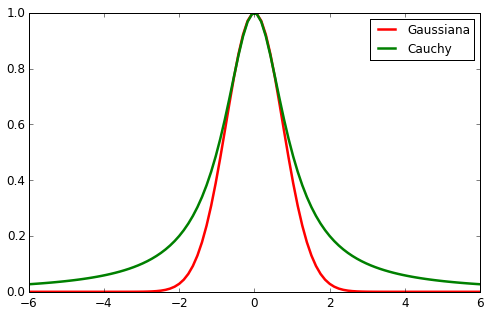

In [25]:
def G3_E4_a():
    t = np.linspace(-6,6,100)
    plt.figure(1)
    plt.plot(t, gauss(t, s=0.75,mu=0)/gauss(0,s = 0.75,mu=0), "r-", label="Gaussiana")
    plt.plot(t, cauchy(t)/cauchy(0),"g-", label="Cauchy")
    plt.legend(loc=0)

G3_E4_a()

###Inciso b: Graficar suma de Gaussianas frente a una distribución de Cauchy

Al sumar muchas funciones distribución, la función resultante debe estar normalizada. Si integramos la suma de dos gaussianas

In [10]:
%%latex
\[ \int_{-\infty}^{+\infty} (a N(0,\sigma_1) + b N(0, \sigma_2) )dx = a \int_{-\infty}^{+\infty} N(0,\sigma_1) dx +  b \int_{-\infty}^{+\infty} N(0, \sigma_2) dx = a + b = 1 \]

<IPython.core.display.Latex object>

Este resultado se puede extender para cualquier función de distribución y para cualquier cantidad de términos en la suma, mientras la función resultante esté definida en el mismo espacio

####Codigo

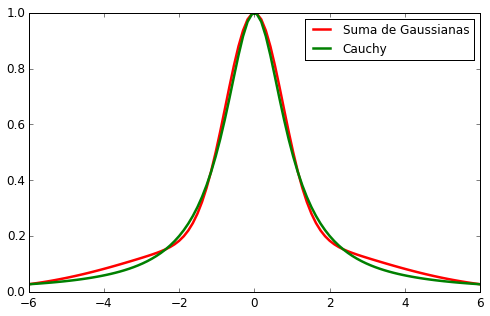

In [26]:
@interact(a = (0,1,0.1),s1=(0.5,4,0.1),s2=(0.5,4,0.1))
def G3_E4_b(a = 0.5, s1 = 0.75, s2 = 3):
    t = np.linspace(-6,6,100)
    plt.figure(1)    
    plt.plot(t, f(t, a, s1, s2)/f(0, a, s1, s2), "r-", label="Suma de Gaussianas")
    plt.plot(t, cauchy(t)/cauchy(0),"g-", label="Cauchy")
    plt.legend(loc=0)

Para observar qué pasa para |x|>6, usamos x>6 porque ambas distribuciones, suma de Gaussianas normalizada y Cauchy, son simétricas respecto al valor medio

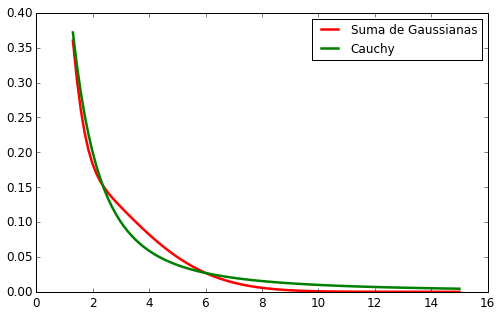

In [27]:
@interact(a = (0,1,0.1),s1=(0.5,4,0.1),s2=(0.5,4,0.1), x0=(0,6,0.1))
def G3_E4_b_1(a = 0.5, s1 = 0.75, s2 = 3, x0 = 2):
    t = np.linspace(x0,15,100)
    plt.figure(1)    
    plt.plot(t, f(t, a, s1, s2)/f(0, a, s1, s2), "r-", label="Suma de Gaussianas")
    plt.plot(t, cauchy(t)/cauchy(0),"g-", label="Cauchy")
    plt.legend(loc=0)


La suma de dos Gaussianas no es suficiente para aproximar las colas de la distribución de Cauchy, que se ve cambiando los parámetros y el inicio del eje. 